# GDP Analysis Case Study

In [1]:
#import the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the Gross Domestic Product csv
statewise_gdp_df=pd.read_csv(r'C:\Upgrad\Dataset\State-wise Gross Domestic Product (GDP) at current price on yearly basis.csv')

In [3]:
#check for duplicates
sum(statewise_gdp_df.duplicated())

0

In [4]:
statewise_gdp_df.shape

(11, 36)

In [5]:
#check the info of the data set like data types and missing values
statewise_gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 36 columns):
Items  Description           11 non-null object
Duration                     11 non-null object
Andhra Pradesh               11 non-null float64
Arunachal Pradesh            9 non-null float64
Assam                        9 non-null float64
Bihar                        9 non-null float64
Chhattisgarh                 11 non-null float64
Goa                          9 non-null float64
Gujarat                      9 non-null float64
Haryana                      11 non-null float64
Himachal Pradesh             7 non-null float64
Jammu & Kashmir              9 non-null float64
Jharkhand                    9 non-null float64
Karnataka                    9 non-null float64
Kerala                       9 non-null float64
Madhya Pradesh               11 non-null float64
Maharashtra                  7 non-null float64
Manipur                      7 non-null float64
Meghalaya                    

# DataCleaning

In [6]:
#check for missing values columnwise
statewise_gdp_df.isna().sum()

Items  Description            0
Duration                      0
Andhra Pradesh                0
Arunachal Pradesh             2
Assam                         2
Bihar                         2
Chhattisgarh                  0
Goa                           2
Gujarat                       2
Haryana                       0
Himachal Pradesh              4
Jammu & Kashmir               2
Jharkhand                     2
Karnataka                     2
Kerala                        2
Madhya Pradesh                0
Maharashtra                   4
Manipur                       4
Meghalaya                     0
Mizoram                       4
Nagaland                      4
Odisha                        0
Punjab                        4
Rajasthan                     4
Sikkim                        2
Tamil Nadu                    0
Telangana                     0
Tripura                       4
Uttar Pradesh                 2
Uttarakhand                   2
West Bengal1                 11
Andaman 

In [7]:
#check for the percentage of missing values column wise and rounding near to 2decimals
round(100*(statewise_gdp_df.isna().sum()/len(statewise_gdp_df.index)),2)

Items  Description             0.00
Duration                       0.00
Andhra Pradesh                 0.00
Arunachal Pradesh             18.18
Assam                         18.18
Bihar                         18.18
Chhattisgarh                   0.00
Goa                           18.18
Gujarat                       18.18
Haryana                        0.00
Himachal Pradesh              36.36
Jammu & Kashmir               18.18
Jharkhand                     18.18
Karnataka                     18.18
Kerala                        18.18
Madhya Pradesh                 0.00
Maharashtra                   36.36
Manipur                       36.36
Meghalaya                      0.00
Mizoram                       36.36
Nagaland                      36.36
Odisha                         0.00
Punjab                        36.36
Rajasthan                     36.36
Sikkim                        18.18
Tamil Nadu                     0.00
Telangana                      0.00
Tripura                     

In [8]:
#removing the columns having more than 60% missing values
statewise_gdp_df=statewise_gdp_df.dropna(thresh=0.6,axis=1)

In [9]:
#data set after cleaning
print(statewise_gdp_df.shape)
print(statewise_gdp_df.info())

(11, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 35 columns):
Items  Description           11 non-null object
Duration                     11 non-null object
Andhra Pradesh               11 non-null float64
Arunachal Pradesh            9 non-null float64
Assam                        9 non-null float64
Bihar                        9 non-null float64
Chhattisgarh                 11 non-null float64
Goa                          9 non-null float64
Gujarat                      9 non-null float64
Haryana                      11 non-null float64
Himachal Pradesh             7 non-null float64
Jammu & Kashmir              9 non-null float64
Jharkhand                    9 non-null float64
Karnataka                    9 non-null float64
Kerala                       9 non-null float64
Madhya Pradesh               11 non-null float64
Maharashtra                  7 non-null float64
Manipur                      7 non-null float64
Meghalaya           

#Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.

In [10]:
statewise_gdp_df=statewise_gdp_df[~(((statewise_gdp_df['Items  Description'] == '(% Growth over previous year)') | (statewise_gdp_df['Items  Description'] == "GSDP - CURRENT PRICES (` in Crore)")) & (statewise_gdp_df['Duration']=='2016-17'))]

In [11]:
statewise_gdp_df

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,751485.00,359433.00,19208.00,724049.00,115523.00,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,855481.00,401493.00,21663.00,822903.00,131835.00,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,971090.00,452186.00,25593.00,944146.00,149817.00,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,1092564.00,511178.00,29667.00,1043371.00,161985.00,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,1212668.00,575631.00,NaN,1153795.00,184091.00,NaN,30304.00,551963.00,26533.00,13675331.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.84,11.70,12.78,13.65,14.12,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


Calacuated average growth of states for the duration 2013-14, 2014-15 and 2015-16 by taking the mean
of the row '(% Growth over previous year)'

In [12]:
#computed the mean of row 8 to 10 and stored in avg_growth_states data frame
avg_growth_states=statewise_gdp_df.loc[7:,:].groupby("Items  Description").mean()

In [13]:
#assuming graph should be plotted only for states removing All india GDP
avg_growth_states=avg_growth_states.drop('All_India GDP',axis=1)

In [14]:
#Sorted the data frame in ascending order based on average growth of states
avg_growth_states=avg_growth_states.sort_values(by='(% Growth over previous year)',axis=1)

In [15]:
#reviewing the resultant dataframe
avg_growth_states.head()

,Goa,Meghalaya,Odisha,Sikkim,Jammu & Kashmir,Gujarat,Punjab,Maharashtra,Rajasthan,Jharkhand,...,Bihar,Chhattisgarh,Andaman & Nicobar Islands,Andhra Pradesh,Karnataka,Arunachal Pradesh,Manipur,Nagaland,Tripura,Mizoram
Items Description,,,,,,,,,,,,,,,,,,,,,
(% Growth over previous year),6.033333,6.953333,9.836667,10.486667,10.9,11.126667,11.185,11.26,11.32,11.5,...,13.603333,13.703333,13.785,14.033333,14.12,14.413333,14.61,16.415,17.03,17.7


In [16]:
#plt.figure(figsize=(12,6))
#labels = ['\n'.join(wrap(l,30)) for l in avg_growth_states.T.index.values]
#sizes = avg_growth_states.T["(% Growth over previous year)"].values
#plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=60,counterclock=False,pctdistance=0.85)
#plt.title("Percentage contribution of all states to average growth rate",fontsize=13)
#plt.tight_layout()
#plt.show()

Bar chart to show the average rate of growth in ascending order 

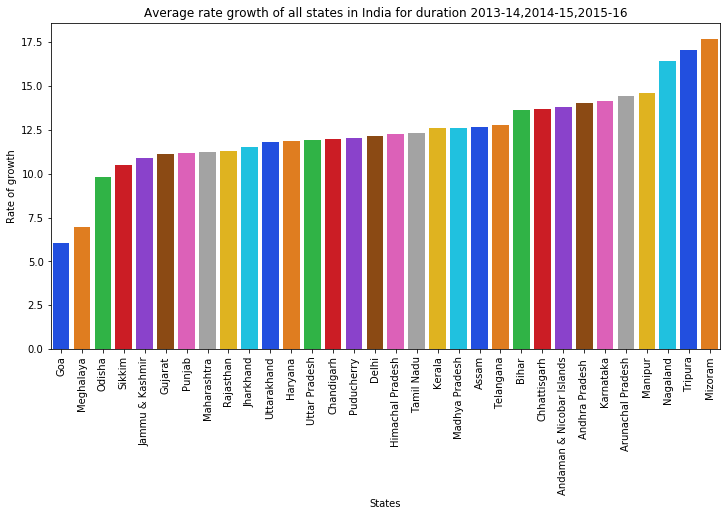

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(avg_growth_states.columns,avg_growth_states.values[0],palette="bright")
plt.xticks(rotation='vertical')
plt.title("Average rate growth of all states in India for duration 2013-14,2014-15,2015-16")
plt.xlabel("States")
plt.ylabel("Rate of growth")
plt.show()

In [18]:
avg_growth_states.sort_values(by='(% Growth over previous year)',axis=1,ascending=False).columns[:5]

Index(['Mizoram', 'Tripura', 'Nagaland', 'Manipur', 'Arunachal Pradesh'], dtype='object')

In [19]:
#Which states have been growing consistently fast, and which ones have been struggling?

Mizoram, Tripura, Nagaland, Manipur, Arunachal Pradesh are growing consistently 
where as 

Jammu and Kashmir, Sikkim, Odisha, Meghalaya, Goa are struggling in growth

In [20]:
#My home state Telangana is having above average in terms of growth rate it stood at 11 position from top

task: Plot the total GDP of the states for the year 2015-16

In [21]:
statewise_gdp_df.head(2)

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,751485.0,359433.0,19208.0,724049.0,115523.0,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,855481.0,401493.0,21663.0,822903.0,131835.0,4421.0,21609.0,391238.0,18875.0,9946636.0


In [22]:
#retrieving the required columns from statewise data frame and storing it in total GDP data frame
#Assuming Plot should be only for states removing Duration and All india GDP columns for the dataset

In [23]:
total_GDP_df=statewise_gdp_df[(statewise_gdp_df['Items  Description'] == "GSDP - CURRENT PRICES (` in Crore)")\
                              & (statewise_gdp_df['Duration']=='2015-16')].drop(["Duration","All_India GDP"],axis=1)

In [24]:
total_GDP_df.head()

,Items Description,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry
4,GSDP - CURRENT PRICES (` in Crore),609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,NaN,...,16637.0,1212668.0,575631.0,NaN,1153795.0,184091.0,NaN,30304.0,551963.0,26533.0


In [25]:
#statewise_gdp_df.loc[:3].groupby('Items  Description').mean()

In [26]:
#check for the missing values column wise
total_GDP_df.isna().sum()

Items  Description           0
Andhra Pradesh               0
Arunachal Pradesh            0
Assam                        0
Bihar                        0
Chhattisgarh                 0
Goa                          0
Gujarat                      0
Haryana                      0
Himachal Pradesh             1
Jammu & Kashmir              0
Jharkhand                    0
Karnataka                    0
Kerala                       0
Madhya Pradesh               0
Maharashtra                  1
Manipur                      1
Meghalaya                    0
Mizoram                      1
Nagaland                     1
Odisha                       0
Punjab                       1
Rajasthan                    1
Sikkim                       0
Tamil Nadu                   0
Telangana                    0
Tripura                      1
Uttar Pradesh                0
Uttarakhand                  0
Andaman & Nicobar Islands    1
Chandigarh                   0
Delhi                        0
Puducher

In [27]:
#Dropping the missing values columns from the dataset and reviewing it after removal
total_GDP_df=total_GDP_df.dropna(axis=1)
total_GDP_df

,Items Description,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Jammu & Kashmir,...,Meghalaya,Odisha,Sikkim,Tamil Nadu,Telangana,Uttar Pradesh,Uttarakhand,Chandigarh,Delhi,Puducherry
4,GSDP - CURRENT PRICES (` in Crore),609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,118387.0,...,26745.0,341887.0,16637.0,1212668.0,575631.0,1153795.0,184091.0,30304.0,551963.0,26533.0


In [28]:
#revalidating to reconfirm no missing values in data set
total_GDP_df.isna().sum()

Items  Description    0
Andhra Pradesh        0
Arunachal Pradesh     0
Assam                 0
Bihar                 0
Chhattisgarh          0
Goa                   0
Gujarat               0
Haryana               0
Jammu & Kashmir       0
Jharkhand             0
Karnataka             0
Kerala                0
Madhya Pradesh        0
Meghalaya             0
Odisha                0
Sikkim                0
Tamil Nadu            0
Telangana             0
Uttar Pradesh         0
Uttarakhand           0
Chandigarh            0
Delhi                 0
Puducherry            0
dtype: int64

In [29]:
#seting index to Items Description
total_GDP_df=total_GDP_df.set_index("Items  Description")

In [30]:
#transpose the dataset to get in required form for ploting
total_GDP_df=total_GDP_df.T

In [31]:
total_GDP_df.head(2)

Items Description,GSDP - CURRENT PRICES (` in Crore)
Andhra Pradesh,609934.0
Arunachal Pradesh,18784.0


In [32]:
#Fetching reuired values and labels to plot
total_GDP_df=total_GDP_df.sort_values(by="GSDP - CURRENT PRICES (` in Crore)")
labels=total_GDP_df.index
sorted_values=total_GDP_df["GSDP - CURRENT PRICES (` in Crore)"].values

Plot the total GDP of the states for the year 2015-16:

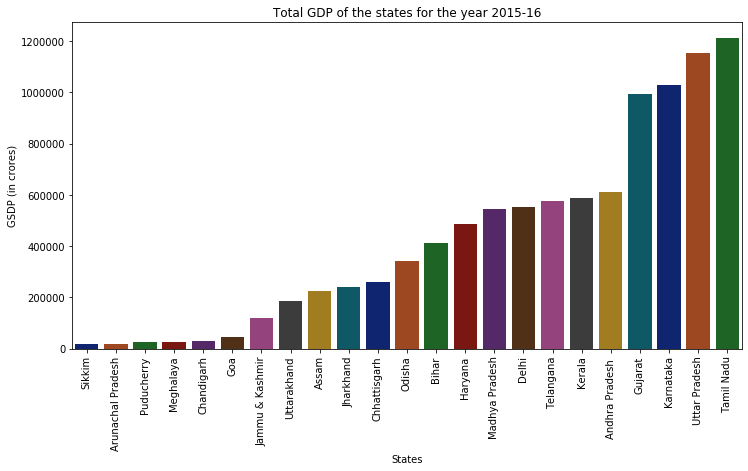

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(labels,sorted_values,palette="dark")
plt.xticks(rotation='vertical')
plt.title("Total GDP of the states for the year 2015-16")
plt.ylabel("GSDP (in crores)")
plt.xlabel("States")
plt.show()

In [34]:
#Identify the top 5 and the bottom 5 states based on total GDP.

In [35]:
#After removing some states due to non availability of values

Sikkim, Arunachal Pradesh, Puducherry, Meghalaya, Chandigarh are the bottom 5 states in total gdp for year 2015-16

Tamil Nadu, Uttar Pradesh,Karnatka, Gujarat, Andhra pradesh are the top 5 states in total GDP for year 2015-16

# Part I-B

Loading individual states data and appending a state row for identification

In [36]:
#loaded andhra pradesh state data and reviewed after appending the row
AP_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv')
AP_df=AP_df[["Item","2014-15"]]
AP_df.loc[len(AP_df.index)]='Andhra Pradesh'
AP_df=AP_df.set_index("Item")
AP_df=AP_df.rename({"Andhra Pradesh":"State"})

In [37]:
AP_df.tail()

,2014-15
Item,
Subsidies on products,1690800
Gross State Domestic Product,52646842
Population ('00),501510
Per Capita GSDP (Rs.),104977
State,Andhra Pradesh


In [38]:
AR_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv')
AR_df=AR_df[["Item","2014-15"]]
AR_df.loc[len(AR_df.index)]='Arunachal Pradesh'
AR_df=AR_df.set_index("Item")
AR_df=AR_df.rename({"Arunachal Pradesh":"State"})

In [39]:
AR_df.tail()

,2014-15
Item,
Subsidies on products,30272
Gross State Domestic Product,1676119
Population ('00),14870
Per Capita GSDP (Rs.),112718
State,Arunachal Pradesh


Similarly loaded all the states data into individual data frames

In [40]:
AS_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Assam-GSVA_cur_2015-16.csv')
AS_df=AS_df[["Item","2014-15"]]
AS_df.loc[len(AS_df.index)]='Assam'
AS_df=AS_df.set_index("Item")
AS_df=AS_df.rename({"Assam":"State"})

In [41]:
BR_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Bihar-GSVA_cur_2015-16.csv')
BR_df=BR_df[["Item","2014-15"]]
BR_df.loc[len(BR_df.index)]='Bihar'
BR_df=BR_df.set_index("Item")
BR_df=BR_df.rename({"Bihar":"State"})

In [42]:
CG_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Chhattisgarh-GSVA_cur_2016-17.csv')
CG_df=CG_df[["Item","2014-15"]]
CG_df.loc[len(CG_df.index)]='Chhattisgarh'
CG_df=CG_df.set_index("Item")
CG_df=CG_df.rename({"Chhattisgarh":"State"})

In [43]:
GA_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Goa-GSVA_cur_2015-16.csv')
GA_df=GA_df[["Item","2014-15"]]
GA_df.loc[len(GA_df.index)]='Goa'
GA_df=GA_df.set_index("Item")
GA_df=GA_df.rename({"Goa":"State"})

In [44]:
GJ_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Gujarat-GSVA_cur_2015-16.csv')
GJ_df=GJ_df[["Item","2014-15"]]
GJ_df.loc[len(GJ_df.index)]='Gujarat'
GJ_df=GJ_df.set_index("Item")
GJ_df=GJ_df.rename({"Gujarat":"State"})

In [45]:
HR_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Haryana-GSVA_cur_2016-17.csv')
HR_df=HR_df[["Item","2014-15"]]
HR_df.loc[len(HR_df.index)]='Haryana'
HR_df=HR_df.set_index("Item")
HR_df=HR_df.rename({"Haryana":"State"})

In [46]:
HP_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Himachal_Pradesh-GSVA_cur_2014-15.csv')
HP_df=HP_df[["Item","2014-15"]]
HP_df.loc[len(HP_df.index)]='Himachal Pradesh'
HP_df=HP_df.set_index("Item")
HP_df=HP_df.rename({"Himachal Pradesh":"State"})

In [47]:
JK_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Jammu_Kashmir-GSVA_cur_2015-16.csv')
JK_df=JK_df[["Item","2014-15"]]
JK_df.loc[len(JK_df.index)]='Jammu and Kashmir'
JK_df=JK_df.set_index("Item")
JK_df=JK_df.rename({"Jammu and Kashmir":"State"})

In [48]:
JH_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Jharkhand-GSVA_cur_2015-16.csv')
JH_df=JH_df[["Item","2014-15"]]
JH_df.loc[len(JH_df.index)]='Jharkhand'
JH_df=JH_df.set_index("Item")
JH_df=JH_df.rename({"Jharkhand":"State"})

In [49]:
KA_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Karnataka-GSVA_cur_2015-16.csv')
KA_df=KA_df[["Item","2014-15"]]
KA_df.loc[len(KA_df.index)]='Karnataka'
KA_df=KA_df.set_index("Item")
KA_df=KA_df.rename({"Karnataka":"State"})

In [50]:
KL_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Kerala-GSVA_cur_2015-16.csv')
KL_df=KL_df[["Item","2014-15"]]
KL_df.loc[len(KL_df.index)]='Kerala'
KL_df=KL_df.set_index("Item")
KL_df=KL_df.rename({"Kerala":"State"})

In [51]:
MP_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv')
MP_df=MP_df[["Item","2014-15"]]
MP_df.loc[len(MP_df.index)]='Madhya Pradesh'
MP_df=MP_df.set_index("Item")
MP_df=MP_df.rename({"Madhya Pradesh":"State"})

In [52]:
MH_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Maharashtra-GSVA_cur_2014-15.csv')
MH_df=MH_df[["Item","2014-15"]]
MH_df.loc[len(MH_df.index)]='Maharashtra'
MH_df=MH_df.set_index("Item")
MH_df=MH_df.rename({"Maharashtra":"State"})

In [53]:
#used encoding to remove the csv parsing error
MN_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Manipur-GSVA_cur_2014-15.csv',encoding="cp1250")
MN_df=MN_df[["Item","2014-15"]]
MN_df.loc[len(MN_df.index)]='Manipur'
MN_df=MN_df.set_index("Item")
MN_df=MN_df.rename({"Manipur":"State"})

In [54]:
ML_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Meghalaya-GSVA_cur_2016-17.csv')
ML_df=ML_df[["Item","2014-15"]]
ML_df.loc[len(ML_df.index)]='Meghalaya'
ML_df=ML_df.set_index("Item")
ML_df=ML_df.rename({"Meghalaya":"State"})

In [55]:
MZ_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Mizoram-GSVA_cur_2014-15.csv')
MZ_df=MZ_df[["Item","2014-15"]]
MZ_df.loc[len(MZ_df.index)]='Mizoram'
MZ_df=MZ_df.set_index("Item")
MZ_df=MZ_df.rename({"Mizoram":"State"})

In [56]:
NL_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Nagaland-GSVA_cur_2014-15.csv')
NL_df=NL_df[["Item","2014-15"]]
NL_df.loc[len(NL_df.index)]='Nagaland'
NL_df=NL_df.set_index("Item")
NL_df=NL_df.rename({"Nagaland":"State"})

In [57]:
OR_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Odisha-GSVA_cur_2016-17.csv')
OR_df=OR_df[["Item","2014-15"]]
OR_df.loc[len(OR_df.index)]='Odisha'
OR_df=OR_df.set_index("Item")
OR_df=OR_df.rename({"Odisha":"State"})

In [58]:
PB_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Punjab-GSVA_cur_2014-15.csv')
PB_df=PB_df[["Item","2014-15"]]
PB_df.loc[len(PB_df.index)]='Punjab'
PB_df=PB_df.set_index("Item")
PB_df=PB_df.rename({"Punjab":"State"})

In [59]:
RJ_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Rajasthan-GSVA_cur_2014-15.csv')
RJ_df=RJ_df[["Item","2014-15"]]
RJ_df.loc[len(RJ_df.index)]='Rajasthan'
RJ_df=RJ_df.set_index("Item")
RJ_df=RJ_df.rename({"Rajasthan":"State"})

In [60]:
SK_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Sikkim-GSVA_cur_2015-16.csv')
SK_df=SK_df[["Item","2014-15"]]
SK_df.loc[len(SK_df.index)]='Sikkim'
SK_df=SK_df.set_index("Item")
SK_df=SK_df.rename({"Sikkim":"State"})

In [61]:
TG_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Telangana-GSVA_cur_2016-17.csv')
TG_df=TG_df[["Item","2014-15"]]
TG_df.loc[len(TG_df.index)]='Telangana'
TG_df=TG_df.set_index("Item")
TG_df=TG_df.rename({"Telangana":"State"})

In [62]:
TN_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Tamil_Nadu-GSVA_cur_2016-17.csv')
TN_df=TN_df[["Item","2014-15"]]
TN_df.loc[len(TN_df.index)]='Tamil Nadu'
TN_df=TN_df.set_index("Item")
TN_df=TN_df.rename({"Tamil Nadu":"State"})

In [63]:
TR_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Tripura-GSVA_cur_2014-15.csv')
TR_df=TR_df[["Item","2014-15"]]
TR_df.loc[len(TR_df.index)]='Tripura'
TR_df=TR_df.set_index("Item")
TR_df=TR_df.rename({"Tripura":"State"})

In [64]:
UK_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Uttarakhand-GSVA_cur_2015-16.csv')
UK_df=UK_df[["Item","2014-15"]]
UK_df.loc[len(UK_df.index)]='Uttarakhand'
UK_df=UK_df.set_index("Item")
UK_df=UK_df.rename({"Uttarakhand":"State"})

In [65]:
UP_df=pd.read_csv(r'C:\Upgrad\Dataset\NAD-Uttar_Pradesh-GSVA_cur_2015-16.csv')
UP_df=UP_df[["Item","2014-15"]]
UP_df.loc[len(UP_df.index)]='Uttar Pradesh'
UP_df=UP_df.set_index("Item")
UP_df=UP_df.rename({"Uttar Pradesh":"State"})

Concatinating all the individual state dataframes to form all state data frame 

In [66]:
#Union territories data is not considered to append as mentioned in the case study

In [67]:
All_state_df=pd.concat([AP_df,AR_df,AS_df,BR_df,CG_df,GA_df,GJ_df,HR_df,HP_df,JK_df,JH_df,KA_df,KL_df,MP_df,MH_df,\
           MN_df,ML_df,MZ_df,NL_df,OR_df,PB_df,RJ_df,SK_df,TN_df,TG_df,TR_df,UK_df,UP_df],axis=1,sort=False)

In [68]:
All_state_df.shape

(38, 28)

In [69]:
All_state_df.head()

,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,...,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15
"Agriculture, forestry and fishing",14819416,686117,3855548,7951890,3948847,308507,1.377e+07,8.01524e+06,1514981,1586705,...,607897,6422978,9285716,15044394,137447,13064238,7591501,799825,1.60142e+06,25097754
Crops,7893514,415520,2890544,4688237,2613371,140421,9.67109e+06,4.63673e+06,853758,949424,...,375825,4382636,5690972,7673441,114976,7297820,4162493,397591,866146,16215212
Livestock,4309078,38387,173478,2060296,352208,30141,2.69891e+06,2.91617e+06,110304,433133,...,123800,788243,2638842,5356257,17338,4693361,2951299,88176,391188,7096876
Forestry and logging,346160,224017,261987,550132,597785,15744,761616,352254,540950,168093,...,99802,791463,848245,1956660,4529,392705,210741,145096,339293,1404936
Fishing and aquaculture,2270664,8193,529539,653224,385483,122201,638357,110080,9968,36055,...,8470,460636,107657,58036,604,680352,266968,168961,4796,380730


Data Cleaning

In [70]:
#check for missing values row wise
All_state_df.isna().sum(axis=1)

Agriculture, forestry and fishing                                        0
Crops                                                                    0
Livestock                                                                0
Forestry and logging                                                     0
Fishing and aquaculture                                                  0
Mining and quarrying                                                     1
Primary                                                                  0
Manufacturing                                                            0
Electricity, gas, water supply & other utility services                  0
Construction                                                             0
Secondary                                                                0
Trade, repair, hotels and restaurants                                    0
Trade & repair services                                                  1
Hotels & restaurants     

In [71]:
#calculating percentage of missing values row wise
100*round(All_state_df.isna().sum(axis=1)/len(All_state_df.columns),2)

Agriculture, forestry and fishing                                        0.0
Crops                                                                    0.0
Livestock                                                                0.0
Forestry and logging                                                     0.0
Fishing and aquaculture                                                  0.0
Mining and quarrying                                                     4.0
Primary                                                                  0.0
Manufacturing                                                            0.0
Electricity, gas, water supply & other utility services                  0.0
Construction                                                             0.0
Secondary                                                                0.0
Trade, repair, hotels and restaurants                                    0.0
Trade & repair services                                                  4.0

In [72]:
#removing the rows having more than 60% missing values
All_state_df=All_state_df[~(100*round(All_state_df.isna().sum(axis=1)/len(All_state_df.columns),2)>=60)]

In [73]:
#reviewing the data frame after cleaning
All_state_df.head()

,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,...,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15
"Agriculture, forestry and fishing",14819416,686117,3855548,7951890,3948847,308507,1.377e+07,8.01524e+06,1514981,1586705,...,607897,6422978,9285716,15044394,137447,13064238,7591501,799825,1.60142e+06,25097754
Crops,7893514,415520,2890544,4688237,2613371,140421,9.67109e+06,4.63673e+06,853758,949424,...,375825,4382636,5690972,7673441,114976,7297820,4162493,397591,866146,16215212
Livestock,4309078,38387,173478,2060296,352208,30141,2.69891e+06,2.91617e+06,110304,433133,...,123800,788243,2638842,5356257,17338,4693361,2951299,88176,391188,7096876
Forestry and logging,346160,224017,261987,550132,597785,15744,761616,352254,540950,168093,...,99802,791463,848245,1956660,4529,392705,210741,145096,339293,1404936
Fishing and aquaculture,2270664,8193,529539,653224,385483,122201,638357,110080,9968,36055,...,8470,460636,107657,58036,604,680352,266968,168961,4796,380730


Plot the GDP per capita for all the states

In [74]:
#fetching state, Per captia gsdp values required for ploting into a Percapita dataframe
Percapita_df=All_state_df.loc[["State","Per Capita GSDP (Rs.)"],:]

In [75]:
#reviewing the data frame
Percapita_df

,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,...,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15
State,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttarakhand,Uttar Pradesh
Per Capita GSDP (Rs.),104977,112718,60621,33954,86860,271793,141263,164077,147330,75840,...,89607,73979,126606,84837,240274,146503,139035,77358,153076,49450


In [76]:
#sorting the dataframe based of Per capita ascending
Percapita_df=Percapita_df.T.sort_values(by="Per Capita GSDP (Rs.)",axis=0)

In [77]:
Percapita_df.head()

,State,Per Capita GSDP (Rs.)
2014-15,Bihar,33954
2014-15,Uttar Pradesh,49450
2014-15,Manipur,58442
2014-15,Assam,60621
2014-15,Jharkhand,62091


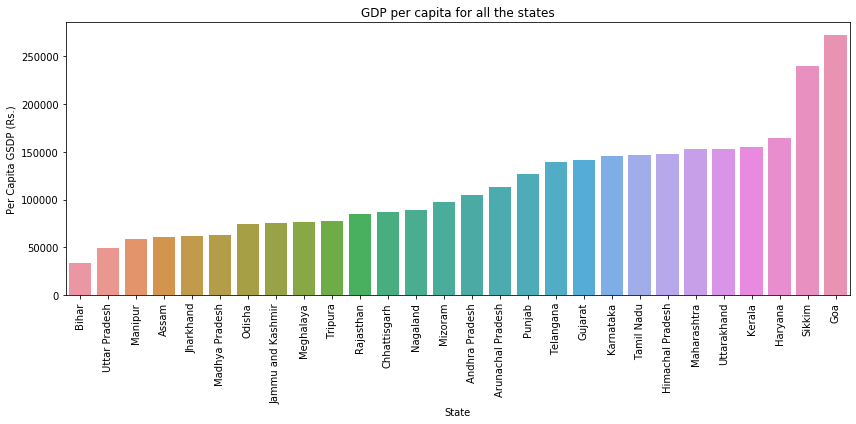

In [78]:
plt.figure(figsize=(12,6))
sns.barplot(Percapita_df["State"],Percapita_df["Per Capita GSDP (Rs.)"])
plt.xticks(rotation="vertical")
plt.title("GDP per capita for all the states")
plt.tight_layout()
plt.show()

In [79]:
#bottom 5 states GDP based per capita

Bihar, Uttar pradesh, Manipur, Assam, Jharkhand

In [80]:
#top 5 states GDP based per capita

Goa,Sikkiim, Haryana, Kerala, uttarakhand, Maharashtra

In [81]:
#Find the ratio of the highest per capita GDP to the lowest per capita GDP

In [82]:
#logic divide the highest values by lowest values(using index)
Percapita_df["Per Capita GSDP (Rs.)"].iloc[len(Percapita_df.index)-1]/Percapita_df["Per Capita GSDP (Rs.)"].\
iloc[0]

8.004741709371503

the ratio of the highest per capita GDP to the lowest per capita GDP is around 8

Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage
of the total GDP for all the states

In [83]:
#fetching the index of primary,secondary, teritary and gdp rows
index_primary=len(All_state_df.loc[:"Primary"].index)-1
index_GDP=len(All_state_df.loc[:"Gross State Domestic Product"].index)-1
index_secondary=len(All_state_df.loc[:"Secondary"].index)-1
index_tertiary=len(All_state_df.loc[:"Tertiary"].index)-1

In [84]:
#append the row having percentage of primary in GDP and rename it to Percentage primary
All_state_df.loc[len(All_state_df.index)]=100*((All_state_df.iloc[index_primary]/All_state_df.iloc[index_GDP])).\
apply(lambda x:round(x,3))
All_state_df=All_state_df.rename({len(All_state_df.index)-1:"Percentage primary"})

In [85]:
All_state_df.loc[len(All_state_df.index)]=100*((All_state_df.iloc[index_secondary]/All_state_df.iloc[index_GDP])).\
apply(lambda x:round(x,3))
All_state_df=All_state_df.rename({len(All_state_df.index)-1:"Percentage Secondary"})

In [86]:
All_state_df.loc[len(All_state_df.index)]=100*((All_state_df.iloc[index_tertiary]/All_state_df.iloc[index_GDP])).\
apply(lambda x:round(x,3))
All_state_df=All_state_df.rename({len(All_state_df.index)-1:"Percentage Tertiary"})

In [87]:
All_state_df.tail(4)

,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,...,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15,2014-15
State,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttarakhand,Uttar Pradesh
Percentage primary,31,42.8,26.9,21.4,27.2,7.7,17.8,18.4,14.8,16.1,...,33.5,28,25.3,31.2,9.1,12.2,17.9,31.8,11.4,24.9
Percentage Secondary,19.9,17.2,20.4,16,35.1,38.1,36.9,28.7,39.5,22.7,...,11.5,27.9,21.5,21.3,55.6,30.1,19.4,16.3,47.2,24.5
Percentage Tertiary,41.9,37.7,47,59.3,32.3,42.8,33.8,44,39.6,55.9,...,53.9,38.1,45.4,42.5,31.8,48.8,55.7,50,34.5,44.1


Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total 
GDP for all the states

In [88]:
#coping the last 4 required rows to percentage data frame 
Percentage_df=All_state_df.tail(4)

In [89]:
#transposing the data frame and setting its index to state as required to plot it
Percentage_df=Percentage_df.T
Percentage_df=Percentage_df.set_index("State")

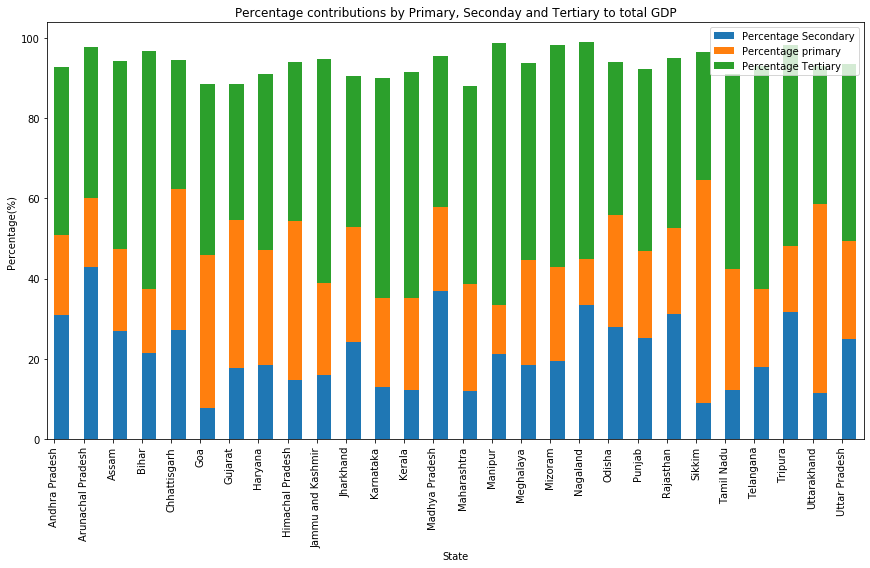

In [90]:
#ploting a stacked plot
Percentage_df.plot(kind='bar',stacked=True,figsize=(12,8),position=0)
plt.title("Percentage contributions by Primary, Seconday and Tertiary to total GDP")
plt.tight_layout()
plt.ylabel("Percentage(%)")
plt.legend((np.take(np.array(Percentage_df.columns), np.argsort(Percentage_df.values)[0])), loc='upper right')
plt.show()

Additional work to show the percentage of sectors (primary,secondary,tertiary, others) contributed to total GDP in each state

In [91]:
test=Percentage_df

In [92]:
test["other"]=100-(test["Percentage primary"]+test["Percentage Secondary"]+test["Percentage Tertiary"])

In [93]:
test=test.T

In [94]:
from textwrap import wrap

In [95]:
def pie_chart1(dataframe,column):
    labels = ['\n'.join(wrap(l,30)) for l in dataframe.index.values]
    sizes = dataframe[column].values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0,counterclock=False)
    plt.title("Percentage contribution of all sectors to total GSDP for "+column,fontsize=13)
    plt.tight_layout()
    plt.show()

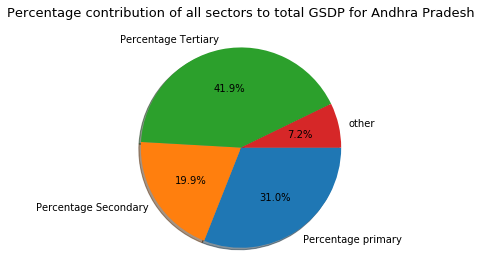

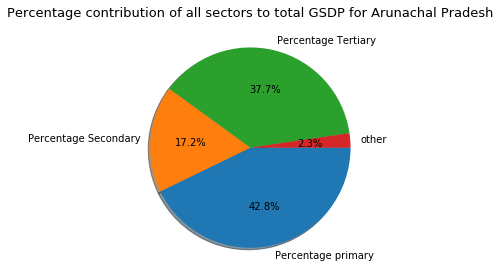

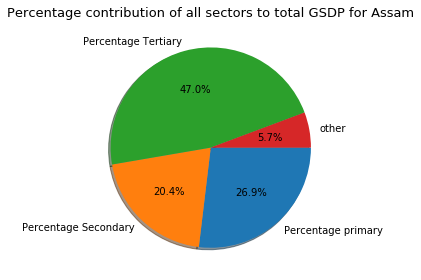

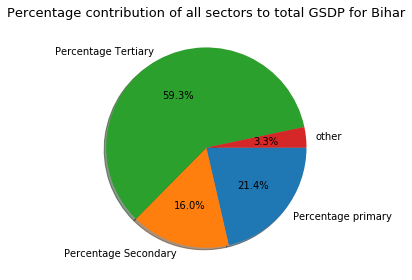

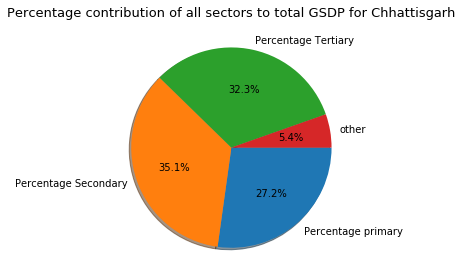

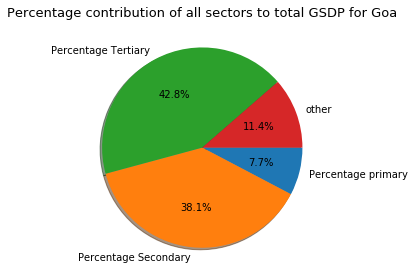

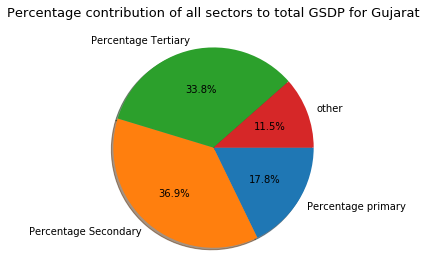

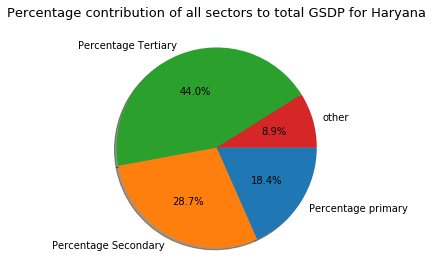

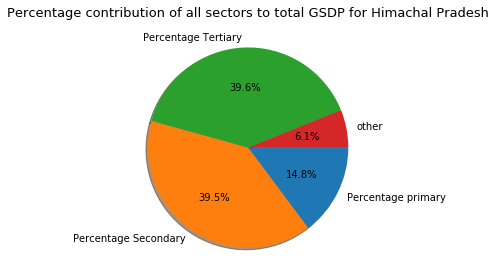

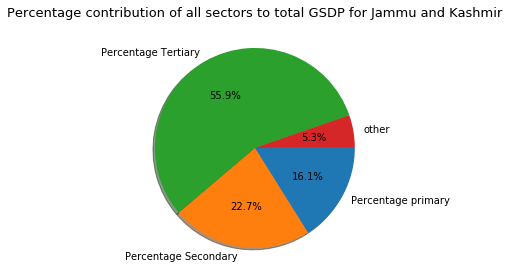

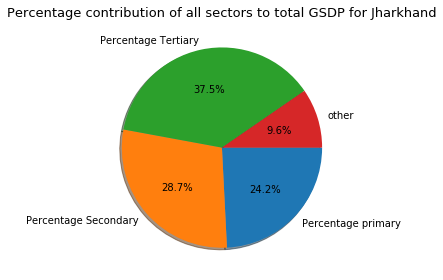

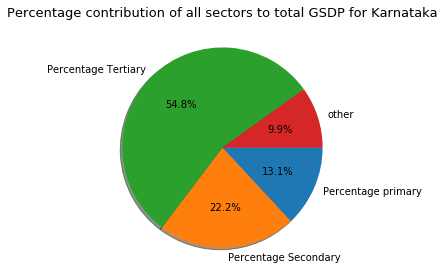

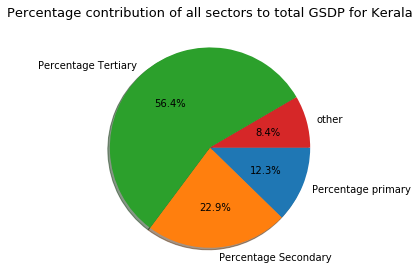

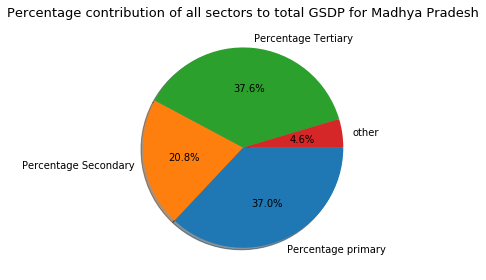

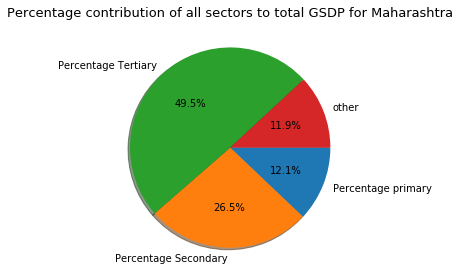

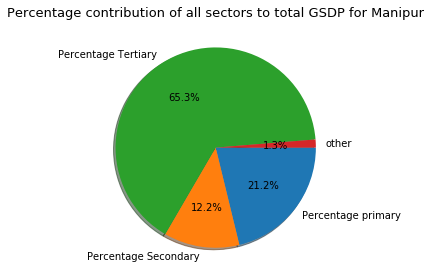

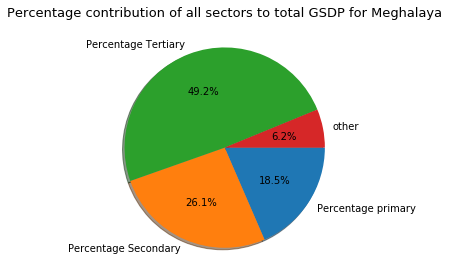

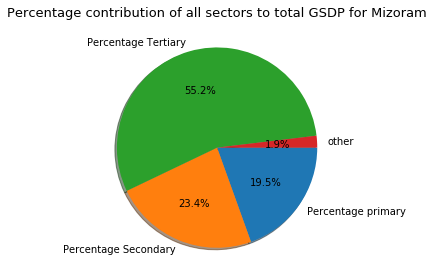

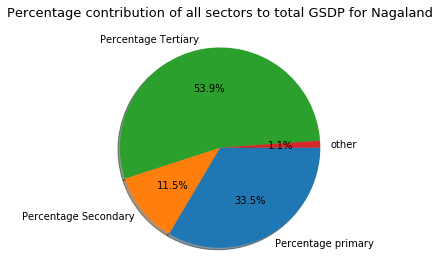

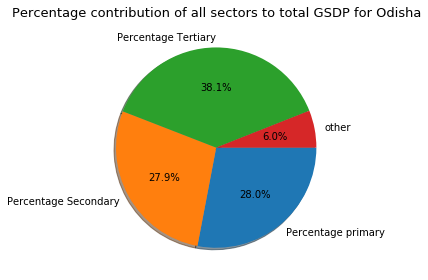

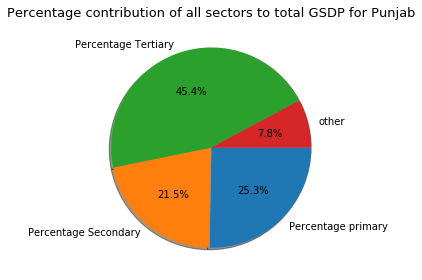

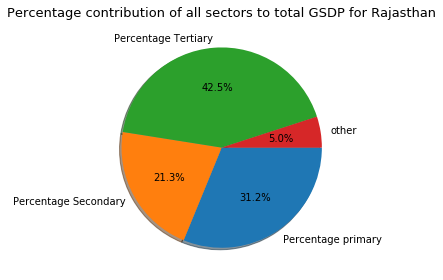

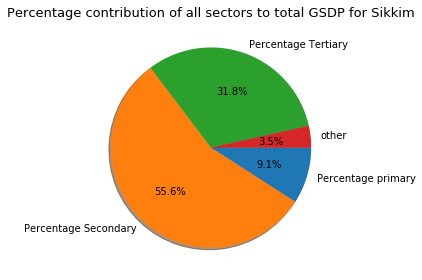

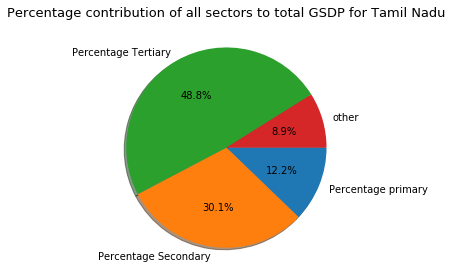

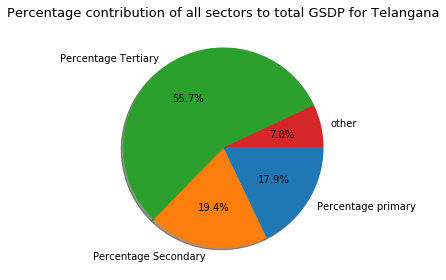

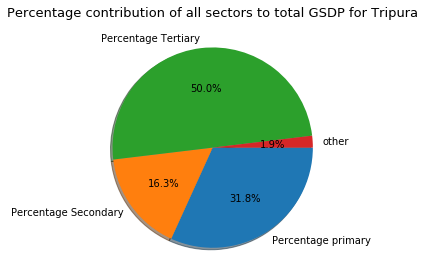

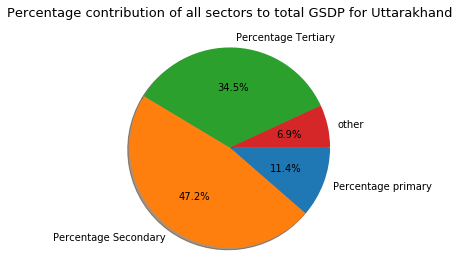

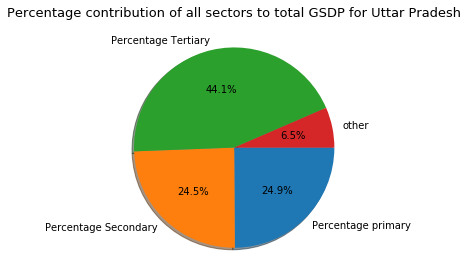

In [96]:
for column in test.columns:
    pie_chart1(test,column)

Categorise the states into four groups based on the GDP per capita 

In [97]:
#creating all category dataframe from all states dataframe
All_Catergories=All_state_df.T.set_index("State")

In [98]:
#sort the all category dataframe based on per captia descending which is used to categorize states based on percentiles
All_Catergories=All_Catergories.sort_values(by="Per Capita GSDP (Rs.)",ascending=False)

In [99]:
All_Catergories.shape

(28, 36)

In [100]:
All_Catergories.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Goa to Bihar
Data columns (total 36 columns):
Agriculture, forestry and fishing                                       28 non-null object
Crops                                                                   28 non-null object
Livestock                                                               28 non-null object
Forestry and logging                                                    28 non-null object
Fishing and aquaculture                                                 28 non-null object
Mining and quarrying                                                    27 non-null object
Primary                                                                 28 non-null object
Manufacturing                                                           28 non-null object
Electricity, gas, water supply & other utility services                 28 non-null object
Construction                                                            28 non

In [101]:
#fetching the percapita values to categorize
values=All_Catergories["Per Capita GSDP (Rs.)"].values

In [102]:
#finding the 85 percentile values 
np.quantile(values,0.85)

153064.85

In [103]:
#Assuming Category1 should have all the states having per capita greater than equal to 85 percentile of per capita

In [104]:
Category1=All_Catergories[All_Catergories["Per Capita GSDP (Rs.)"]>=np.quantile(values,0.85)]

In [105]:
#Reviewing the category 1 data frame
Category1

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Percentage primary,Percentage Secondary,Percentage Tertiary
State,,,,,,,,,,,,,,,,,,,,,
Goa,308507,140421,30141,15744,122201,3622,312129,1177608,204110,165819,...,1738217,3597882,527279,61854,4063307,14950,271793,7.7,38.1,42.8
Sikkim,137447,114976,17338,4529,604,1329,138776,550697,212499,82058,...,483103,1467133,72200,18400,1520933,6330,240274,9.1,55.6,31.8
Haryana,8.01524e+06,4.63673e+06,2.91617e+06,352254,110080,25186,8.04042e+06,7.75692e+06,1.10192e+06,3.70257e+06,...,1.92266e+07,3.98284e+07,4.98567e+06,1.06787e+06,4.37462e+07,266620,164077,18.4,28.7,44
Kerala,5930617,3070386,1656104,499808,704319,558824,6489442,4273567,482470,7314003,...,29673778,48233259,5189352,822381,52600230,339843,154778,12.3,22.9,56.4
Uttarakhand,1.60142e+06,866146,391188,339293,4796,244549,1.84597e+06,5.86625e+06,433880,1.34273e+06,...,5.58798e+06,1.50768e+07,1.43486e+06,313139,1.61985e+07,105820,153076,11.4,47.2,34.5


In [106]:
#fecting sub sectors and storing to subsectors_cat1 data frame
#cat1 refers to category1
Subsectors_cat1=Category1.loc[:,["Agriculture, forestry and fishing","Mining and quarrying","Manufacturing",\
"Electricity, gas, water supply & other utility services","Construction","Trade, repair, hotels and restaurants",\
"Transport, storage, communication & services related to broadcasting","Financial services",\
"Real estate, ownership of dwelling & professional services","Public administration","Other services","Taxes on Products",\
"Subsidies on products","Gross State Domestic Product"]]

In [107]:
#Reviewing the dataframe
Subsectors_cat1

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Taxes on Products,Subsidies on products,Gross State Domestic Product
State,,,,,,,,,,,,,,
Goa,308507,3622,1177608,204110,165819,380927,189656,233618,407099,346486,180431,527279,61854,4063307
Sikkim,137447,1329,550697,212499,82058,70568,47347,21079,75330,119514,149265,72200,18400,1520933
Haryana,8.01524e+06,25186,7.75692e+06,1.10192e+06,3.70257e+06,4.98632e+06,2.56062e+06,1.67149e+06,6.97018e+06,1.03638e+06,2.00158e+06,4.98567e+06,1.06787e+06,4.37462e+07
Kerala,5930617,558824,4273567,482470,7314003,8557345,4020934,2010306,7287633,2068915,5728645,5189352,822381,52600230
Uttarakhand,1.60142e+06,244549,5.86625e+06,433880,1.34273e+06,1.74311e+06,1.06669e+06,385030,831307,579409,982430,1.43486e+06,313139,1.61985e+07


In [108]:
#computing the net tax applied after subtracting subsidies from taxes and added a column(Net Tax)
Subsectors_cat1["Net Tax"]=Subsectors_cat1["Taxes on Products"]-Subsectors_cat1["Subsidies on products"]

In [109]:
#Taking the mean of the subsectors of category 1
Subsectors_cat1=pd.DataFrame(Subsectors_cat1.mean(),columns=["value"])

In [110]:
#reviewing the resultant dataframe
Subsectors_cat1

,value
"Agriculture, forestry and fishing",3198646.4
Mining and quarrying,166702.0
Manufacturing,3925009.0
"Electricity, gas, water supply & other utility services",486975.6
Construction,2521436.8
"Trade, repair, hotels and restaurants",3147653.0
"Transport, storage, communication & services related to broadcasting",1577050.6
Financial services,864303.8
"Real estate, ownership of dwelling & professional services",3114310.4
Public administration,830140.2


In [111]:
#computing the percentage share of sub scetors in GSDP

In [112]:
Per_subsector_cat1_df=(100*(Subsectors_cat1/Subsectors_cat1.loc["Gross State Domestic Product"])).apply(lambda x:round(x,2))

In [113]:
#droping GSD, Taxes,Subsidies rows
Per_subsector_cat1_df=Per_subsector_cat1_df.drop(["Gross State Domestic Product","Taxes on Products","Subsidies on products"])

In [114]:
#sorting the values based on percenatge 
Per_subsector_cat1_df=Per_subsector_cat1_df.sort_values(by="value",ascending=False)

In [115]:
Per_subsector_cat1_df.head()

,value
Manufacturing,16.61
"Agriculture, forestry and fishing",13.54
"Trade, repair, hotels and restaurants",13.32
"Real estate, ownership of dwelling & professional services",13.18
Construction,10.67


In [116]:
Per_subsector_cat1_df.cumsum()

,value
Manufacturing,16.61
"Agriculture, forestry and fishing",30.15
"Trade, repair, hotels and restaurants",43.47
"Real estate, ownership of dwelling & professional services",56.65
Construction,67.32
Net Tax,75.72
Other services,83.37
"Transport, storage, communication & services related to broadcasting",90.05
Financial services,93.71
Public administration,97.22


Find the top 3/4/5 sub-sectors that contribute to approximately 80% of the GSDP of each category

In [117]:
Per_topsubsector_cat1_df=Per_subsector_cat1_df[(((Per_subsector_cat1_df.loc[:,"value"].\
                                                  apply(lambda x:round(x,0)).values.cumsum()))<=80)]

Top sub sectors from Category1

In [118]:
Per_topsubsector_cat1_df

,value
Manufacturing,16.61
"Agriculture, forestry and fishing",13.54
"Trade, repair, hotels and restaurants",13.32
"Real estate, ownership of dwelling & professional services",13.18
Construction,10.67
Net Tax,8.40


In [126]:
#importing wrap to wrap the lengthy labels in the plot
from textwrap import wrap

In [127]:
#creating a reusable pie chart function 
def pie_chart(dataframe,category,division,angle):
    labels = ['\n'.join(wrap(l,30)) for l in dataframe.index.values]
    sizes = dataframe['value'].values
    plt.figure(figsize=(18,8))
    #plt.tight_layout()
    plt.subplot(1,2,1)
    plt.title("Percentage contribution of "+division+" subsectors to total GSDP bar chart for "+category,fontsize=13)
    plt.bar(x=labels,height=sizes)#width=0.5
    plt.xticks(rotation='vertical')
    plt.subplot(1,2,2)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=angle,counterclock=False)
    plt.title("Percentage contribution of "+division+" subsectors to total GSDP for "+category,fontsize=13)

#plot showing the contribution of top sub sectors of category 1

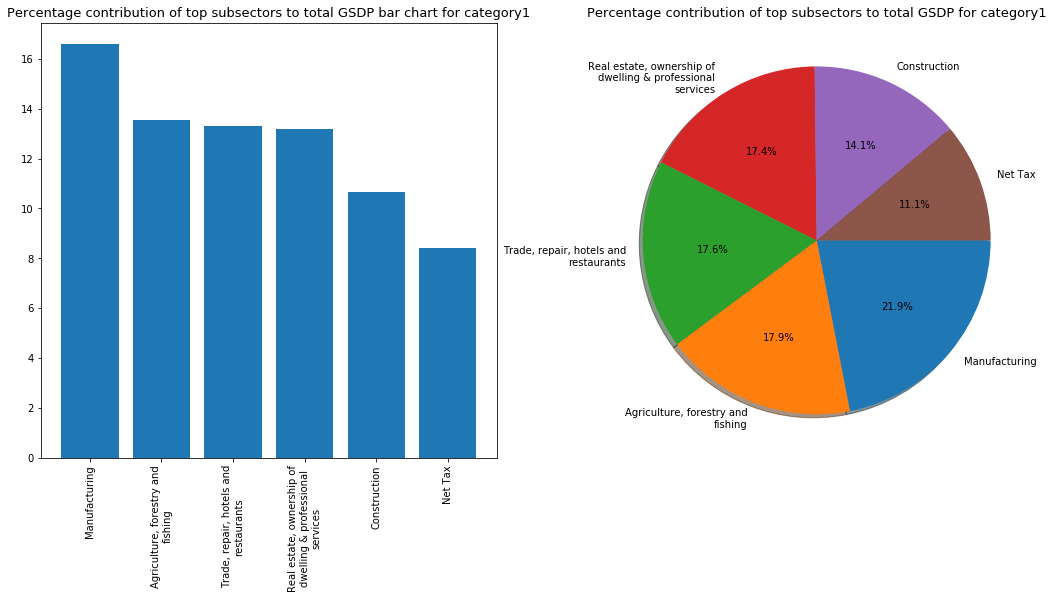

In [128]:
pie_chart(Per_topsubsector_cat1_df,"category1","top",0)

#plot showing the contribution of all sub sectors of category 1

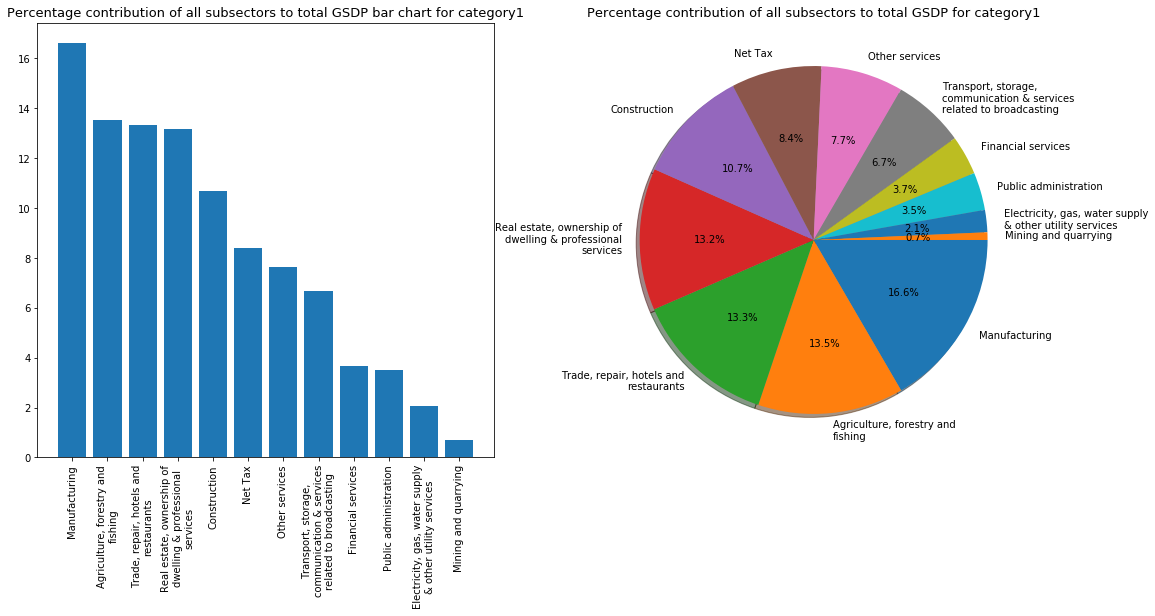

In [129]:
pie_chart(Per_subsector_cat1_df,"category1","all",0)

In [130]:
#Similarly logic for category 2,3,4

In [131]:
#categorizing less than 0.85 and greater than equal to 0.5
Category2=All_Catergories[(All_Catergories["Per Capita GSDP (Rs.)"]>=np.quantile(values,0.5))&\
                       (All_Catergories["Per Capita GSDP (Rs.)"]<np.quantile(values,0.85))]

In [132]:
Category2

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Percentage primary,Percentage Secondary,Percentage Tertiary
State,,,,,,,,,,,,,,,,,,,,,
Maharashtra,16475655,10435121,3972829,1592564,475141,5282727,21758383,33660294,4334702,9450211,...,88631076,157834665,25394800,4017300,179212165,1172450,152853,12.1,26.5,49.5
Himachal Pradesh,1514981,853758,110304,540950,9968,33385,1548366,2543637,767268,808256,...,4133326,9800853,895317,259291,10436879,70840,147330,14.8,39.5,39.6
Tamil Nadu,13064238,7297820,4693361,392705,680352,265536,13329774,18914794,1710379,12216718,...,53343788,99515453,12507325,2766405,109256373,745760,146503,12.2,30.1,48.8
Karnataka,11219422,8157179,1868771,693082,500390,846882,12066304,12953843,1425762,6104799,...,50490630,83041338,11026674,1889206,92178806,635100,145141,13.1,22.2,54.8
Gujarat,1.377e+07,9.67109e+06,2.69891e+06,761616,638357,2.11722e+06,1.58872e+07,2.40875e+07,3.40998e+06,5.52602e+06,...,3.02204e+07,7.91311e+07,1.23532e+07,1.98155e+06,8.95027e+07,633590,141263,17.8,36.9,33.8
Telangana,7591501,4162493,2951299,210741,266968,1541853,9133354,6353711,716266,2854024,...,28471410,47528765,4425700,836700,51117765,367660,139035,17.9,19.4,55.7
Punjab,9285716,5690972,2638842,848245,107657,10354,9296070,4790341,911611,2202962,...,16717805,33918789,3794100,911800,36801089,290673,126606,25.3,21.5,45.4
Arunachal Pradesh,686117,415520,38387,224017,8193,30842,716959,26120,113527,147842,...,631844,1636292,70099,30272,1676119,14870,112718,42.8,17.2,37.7
Andhra Pradesh,14819416,7893514,4309078,346160,2270664,1484300,16303716,4672266,1151729,4664889,...,22032942,48825542,5512100,1690800,52646842,501510,104977,31,19.9,41.9


In [133]:
Subsectors_cat2=Category2.loc[:,["Agriculture, forestry and fishing","Mining and quarrying","Manufacturing",\
"Electricity, gas, water supply & other utility services","Construction","Trade, repair, hotels and restaurants",\
"Transport, storage, communication & services related to broadcasting","Financial services",\
"Real estate, ownership of dwelling & professional services","Public administration","Other services","Taxes on Products",\
"Subsidies on products","Gross State Domestic Product"]]

In [134]:
Subsectors_cat2["Net Tax"]=Subsectors_cat2["Taxes on Products"]-Subsectors_cat2["Subsidies on products"]

In [135]:
Subsectors_cat2=pd.DataFrame(Subsectors_cat2.mean(),columns=["value"])
Per_subsector_cat2_df=100*round((Subsectors_cat2/Subsectors_cat2.loc["Gross State Domestic Product"]),3)
Per_subsector_cat2_df=Per_subsector_cat2_df.drop(["Gross State Domestic Product","Taxes on Products","Subsidies on products"])

In [136]:
Per_subsector_cat2_df=Per_subsector_cat2_df.sort_values(by="value",ascending=False)

In [137]:
Per_subsector_cat2_df.cumsum()

,value
Manufacturing,17.3
"Real estate, ownership of dwelling & professional services",32.7
"Agriculture, forestry and fishing",46.9
"Trade, repair, hotels and restaurants",57.1
Net Tax,67.0
Construction,74.1
Other services,80.4
"Transport, storage, communication & services related to broadcasting",86.5
Financial services,92.6
Public administration,95.8


In [138]:
Per_topsubsector_cat2_df=Per_subsector_cat2_df[((Per_subsector_cat2_df.loc[:,"value"].apply(lambda x:round(x,0))\
                                                 .values.cumsum())<=80)]

#plot showing the contribution of top sub sectors of category 2

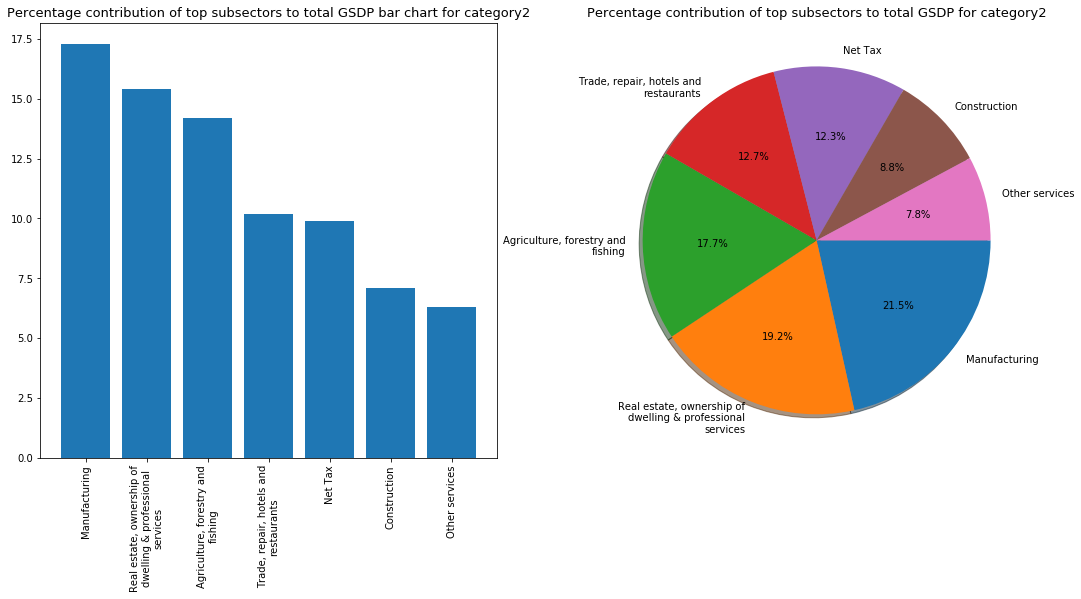

In [139]:
pie_chart(Per_topsubsector_cat2_df,"category2","top",0)

#plot showing the contribution of all sub sectors of category 2

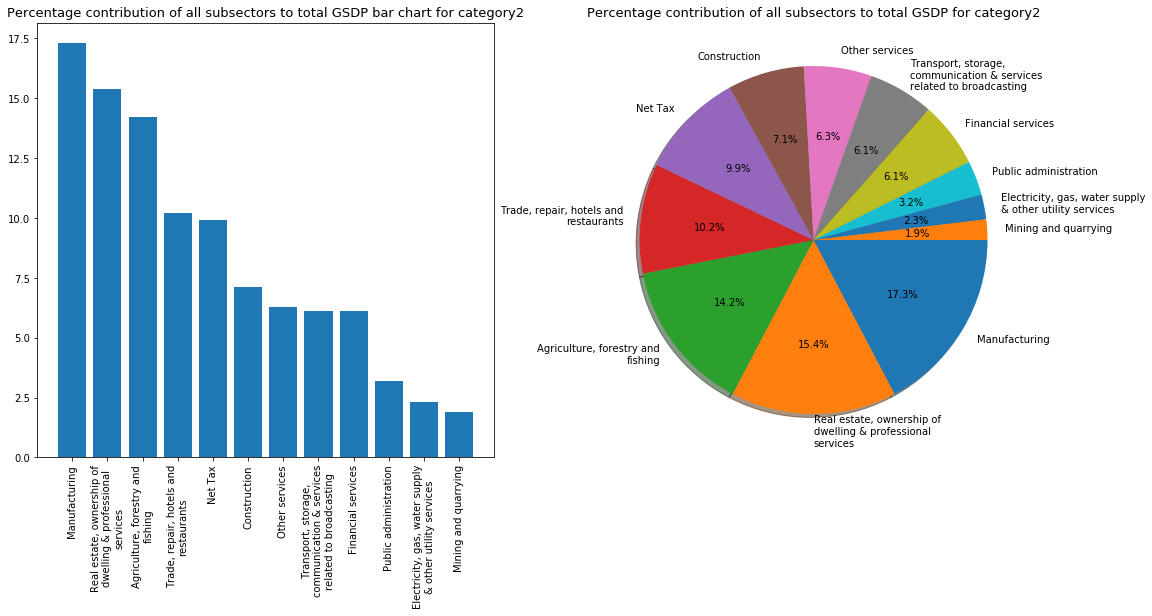

In [140]:
pie_chart(Per_subsector_cat2_df,"category2","all",0)

In [141]:
Category3=All_Catergories[(All_Catergories["Per Capita GSDP (Rs.)"]>=np.quantile(values,0.2))&\
                       (All_Catergories["Per Capita GSDP (Rs.)"]<np.quantile(values,0.5))]

In [142]:
Category3

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Percentage primary,Percentage Secondary,Percentage Tertiary
State,,,,,,,,,,,,,,,,,,,,,
Mizoram,217010,116609,45590,47763,7048,8588,225598,8479,128365,133228,...,637619,1133289,43084,20440,1155933,11833,97687,19.5,23.4,55.2
Nagaland,607897,375825,123800,99802,8470,8280,616178,18346,37944,156072,...,992956,1821495,57674,37745,1841424,20550,89607,33.5,11.5,53.9
Chhattisgarh,3948847,2613371,352208,597785,385483,2451970,6400817,4370593,1198438,2669855,...,7588778,22228481,2601791,1332092,23498180,270530,86860,27.2,35.1,32.3
Rajasthan,15044394,7673441,5356257,1956660,58036,4069385,19113780,6552580,1122888,5353326,...,26015812,58158386,5394503,2333442,61219447,721610,84837,31.2,21.3,42.5
Tripura,799825,397591,88176,145096,168961,142391,942216,228625,77870,177899,...,1.48471e+06,2.91132e+06,149345,94002,2.96666e+06,38350,77358,31.8,16.3,50
Meghalaya,366521,223330,72442,61166,9583,84529,451050,433213,54473,150256,...,1.20066e+06,2.28965e+06,213272,62112,2.44081e+06,32020,76228,18.5,26.1,49.2
Jammu and Kashmir,1586705,949424,433133,168093,36055,33621,1620326,893207,597421,785503,...,5613282,9509739,764270,233563,10040446,132390,75840,16.1,22.7,55.9
Odisha,6422978,4382636,788243,791463,460636,2586328,9009306,5754229,833067,2402396,...,12256258,30255256,3151184,1209349,32197092,435220,73979,28,27.9,38.1


In [143]:
Subsectors_cat3=Category3.loc[:,["Agriculture, forestry and fishing","Mining and quarrying","Manufacturing",\
"Electricity, gas, water supply & other utility services","Construction","Trade, repair, hotels and restaurants",\
"Transport, storage, communication & services related to broadcasting","Financial services",\
"Real estate, ownership of dwelling & professional services","Public administration","Other services","Taxes on Products",\
"Subsidies on products","Gross State Domestic Product"]]

In [144]:
Subsectors_cat3["Net Tax"]=Subsectors_cat3["Taxes on Products"]-Subsectors_cat3["Subsidies on products"]

In [145]:
Subsectors_cat3=pd.DataFrame(Subsectors_cat3.mean(),columns=["value"])
Per_subsector_cat3_df=100*round((Subsectors_cat3/Subsectors_cat3.loc["Gross State Domestic Product"]),3)
Per_subsector_cat3_df=Per_subsector_cat3_df.drop(["Gross State Domestic Product","Taxes on Products","Subsidies on products"])

In [146]:
Per_subsector_cat3_df=Per_subsector_cat3_df.sort_values(by="value",ascending=False)

In [147]:
Per_topsubsector_cat3_df=Per_subsector_cat3_df[((Per_subsector_cat3_df.loc[:,"value"].\
                                                 apply(lambda x:round(x,0)).values.cumsum())<=80)]

#plot showing the contribution of top sub sectors of category 3

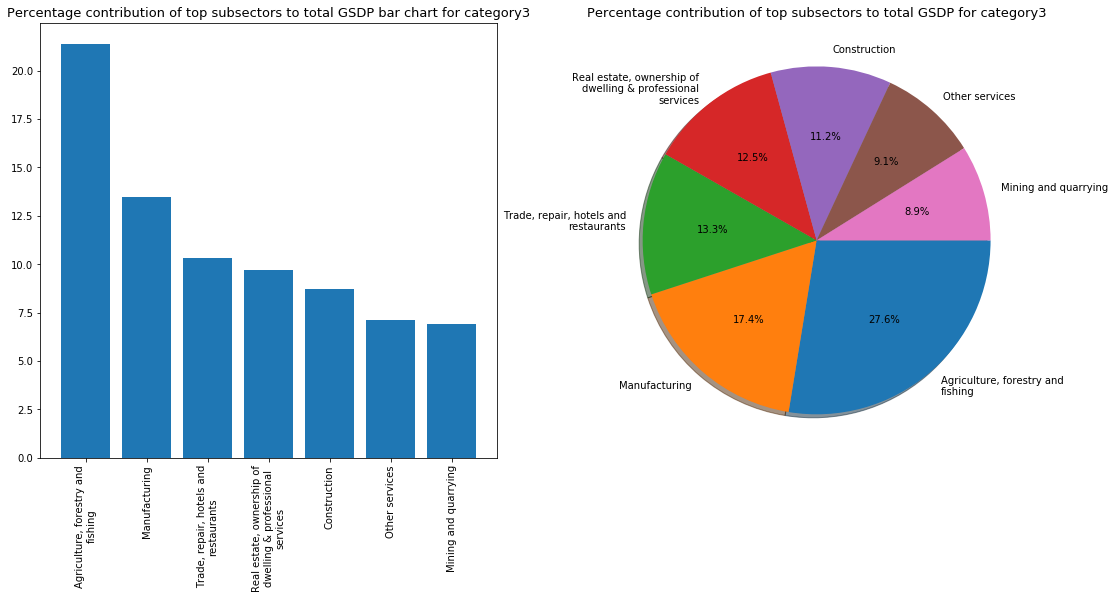

In [148]:
pie_chart(Per_topsubsector_cat3_df,"category3","top",0)

plot showing the contribution of all sub sectors of category 3

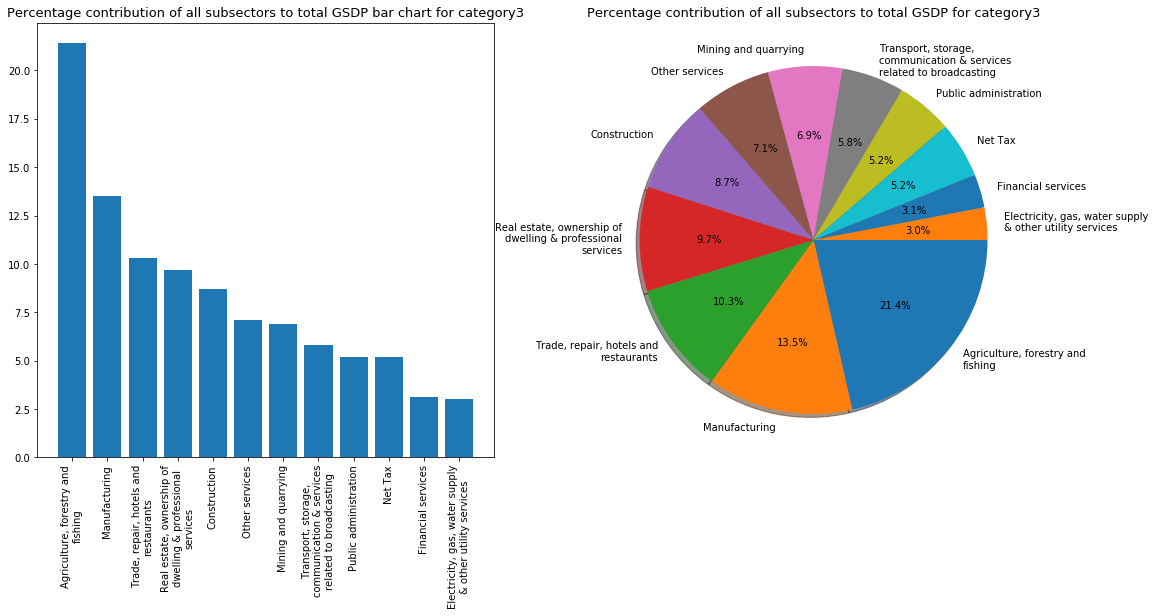

In [149]:
pie_chart(Per_subsector_cat3_df,"category3","all",0)

In [150]:
Category4=All_Catergories[(All_Catergories["Per Capita GSDP (Rs.)"]<np.quantile(values,0.2))]

In [151]:
Category4

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Percentage primary,Percentage Secondary,Percentage Tertiary
State,,,,,,,,,,,,,,,,,,,,,
Madhya Pradesh,16235647,13216013,1932769,965588,121277,1618373,17854020,4368833,1272905,4403151,...,18117360,46016269,4284700,2102800,48198169,765180,62989,37,20.8,37.6
Jharkhand,3211065,2094466,562503,445149,108947,2037289,5248354,4114148,337489,1789834,...,8133341,19623166,2499171,411619,21710718,349660,62091,24.2,28.7,37.5
Assam,3855548,2890544,173478,261987,529539,1471149,5326697,2002936,296587,1733568,...,9307109,18666897,1725309,582406,19809800,326780,60621,26.9,20.4,47
Manipur,383140,226583,75483,45831,35243,NaN,383140,49501,27490,143182,...,1.17733e+06,1.78065e+06,92766,69137,1.80428e+06,30873,58442,21.2,12.2,65.3
Uttar Pradesh,25097754,16215212,7096876,1404936,380730,901501,25999255,12261649,2030625,11256450,...,45968959,97516938,10107396,3287219,104337115,2109940,49450,24.9,24.5,44.1
Bihar,7951890,4688237,2060296,550132,653224,68107,8019997,2189965,345168,3449763,...,22179969,36184863,3213546,2006421,37391988,1101240,33954,21.4,16,59.3


In [152]:
Subsectors_cat4=Category4.loc[:,["Agriculture, forestry and fishing","Mining and quarrying","Manufacturing",\
"Electricity, gas, water supply & other utility services","Construction","Trade, repair, hotels and restaurants",\
"Transport, storage, communication & services related to broadcasting","Financial services",\
"Real estate, ownership of dwelling & professional services","Public administration","Other services","Taxes on Products",\
"Subsidies on products","Gross State Domestic Product"]]

In [153]:
Subsectors_cat4["Net Tax"]=Subsectors_cat4["Taxes on Products"]-Subsectors_cat4["Subsidies on products"]

In [154]:
Subsectors_cat4=pd.DataFrame(Subsectors_cat4.mean(),columns=["value"])
Per_subsector_cat4_df=100*round((Subsectors_cat4/Subsectors_cat4.loc["Gross State Domestic Product"]),3)
Per_subsector_cat4_df=Per_subsector_cat4_df.drop(["Gross State Domestic Product","Taxes on Products","Subsidies on products"])

In [155]:
Per_subsector_cat4_df=Per_subsector_cat4_df.sort_values(by="value",ascending=False)

In [156]:
Per_topsubsector_cat4_df=Per_subsector_cat4_df[((Per_subsector_cat4_df.loc[:,"value"].\
                                                 apply(lambda x:round(x,0)).values.cumsum())<=80)]

plot showing the contribution of top sub sectors of category 4

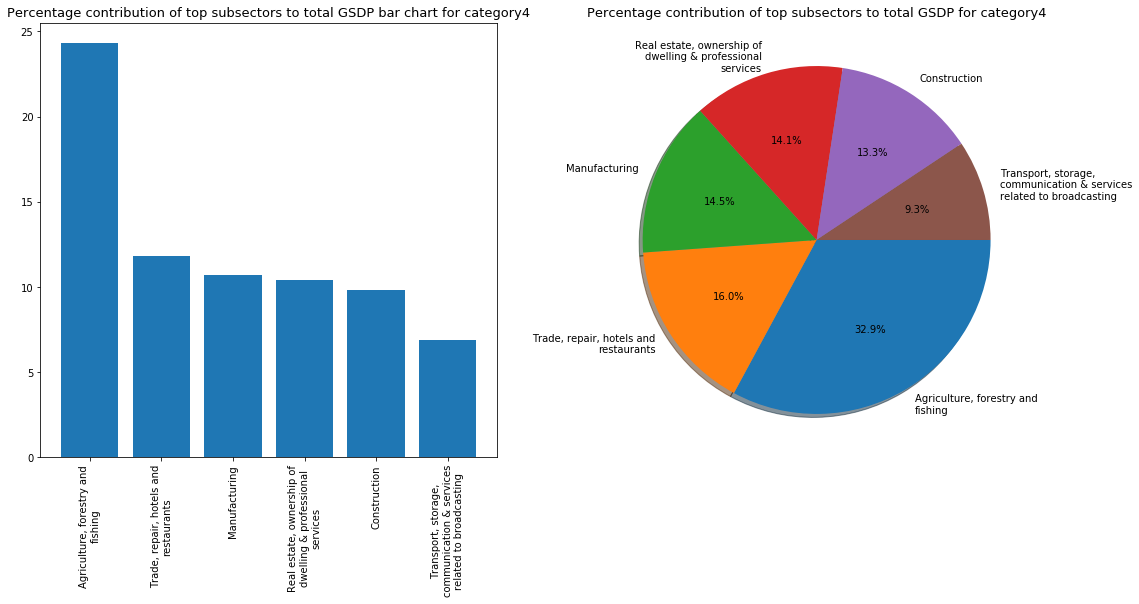

In [157]:
pie_chart(Per_topsubsector_cat4_df,"category4","top",0)

Plot showing the contribution of all sub sectors of category 4

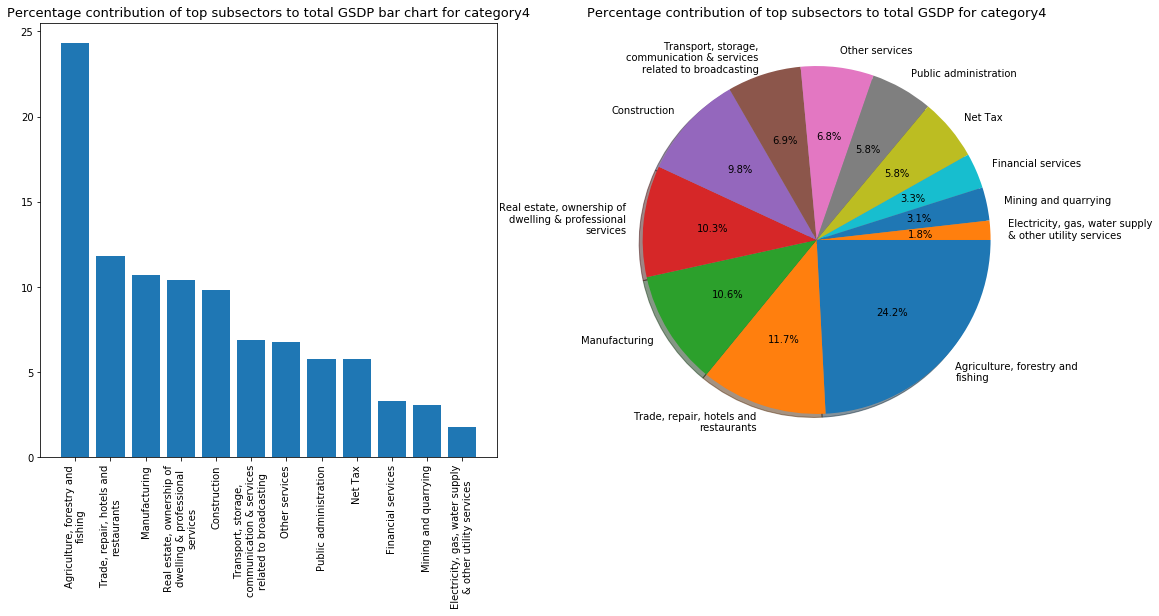

In [158]:
pie_chart(Per_subsector_cat4_df,"category4","top",0)

In [159]:
#How does the GDP distribution of the top states (C1) differ from the others?
#C1 has almost equal distribution among top 5 sub sectors but other has vast difference among the top 5 sub sectors
#C1 is uniformly distributed among to 5 sub sectors but other are expotential decreasing distribution.

In [160]:
#Which sub-sectors seem to be correlated with high GDP?
#Manufacturing,Agriculture,Trade,Real-estate,Construction

In [161]:
#Which sub-sectors do the various categories need to focus on? 
#Electricity, mining,Finacial,public 

# Part II

In [162]:
#loading Drop out dataset
Dropout_df=pd.read_csv(r'C:\Upgrad\Dataset\Dropout\Dropout.csv')

In [163]:
Dropout_df.head()

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


In [164]:
#Filtering Primary, upper primary,secondary
Dropout_df=Dropout_df[["Level of Education - State","Primary - 2014-2015.1","Upper Primary - 2014-2015","Secondary - 2014-2015"]]

In [165]:
Dropout_df.shape

(37, 4)

In [166]:
#renaming Level of Eduaction to State to merge it part 1 data set
Dropout_df=Dropout_df.rename({"Level of Education - State":"State"},axis='columns')

In [167]:
Dropout_df=Dropout_df.set_index("State")

Data Cleaning

In [168]:
#calculating percentage the missing values row wise
round(100*(Dropout_df.isna().sum(axis=1)/len(Dropout_df.columns)),2)

State
A & N Islands            0.00
Andhra Pradesh           0.00
Arunachal Pradesh        0.00
Assam                    0.00
Bihar                   33.33
Chandigarh              66.67
Chhatisgarh              0.00
Dadra & Nagar Haveli     0.00
Daman & Diu              0.00
Delhi                   33.33
Goa                      0.00
Gujarat                  0.00
Haryana                  0.00
Himachal Pradesh         0.00
Jammu and Kashmir        0.00
Jharkhand                0.00
Karnataka                0.00
Kerala                  66.67
Lakshadweep             33.33
Madhya Pradesh           0.00
Maharashtra              0.00
Manipur                  0.00
Meghalaya                0.00
Mizoram                  0.00
Nagaland                 0.00
Odisha                   0.00
Puducherry               0.00
Punjab                   0.00
Rajasthan                0.00
Sikkim                   0.00
Tamil Nadu              66.67
Telangana                0.00
Tripura                  0.00
Utta

In [169]:
#As missing data can't be gathered and data is very less so keeping the missing values as it is..

In [170]:
#Merging Dropout dataset with All states data set to form a Dropout gsdp data set
Dropout_gsdp_df=pd.merge(Dropout_df,All_state_df.T.set_index("State")["Per Capita GSDP (Rs.)"],on="State")

In [171]:
#sort the data set based on per capita to compare the view
Dropout_gsdp_df.sort_values(by="Per Capita GSDP (Rs.)")

,Primary - 2014-2015.1,Upper Primary - 2014-2015,Secondary - 2014-2015,Per Capita GSDP (Rs.)
State,,,,
Bihar,NaN,4.08,25.90,33954
Uttar Pradesh,8.58,2.70,10.22,49450
Manipur,9.66,4.20,14.38,58442
Assam,15.36,10.51,27.06,60621
Jharkhand,5.48,8.99,24.00,62091
Madhya Pradesh,6.59,9.20,24.77,62989
Odisha,2.86,3.81,29.56,73979
Jammu and Kashmir,6.79,5.44,17.28,75840
Meghalaya,9.46,6.52,20.52,76228


In [172]:
Dropout_gsdp_df['Average drop rate']=round(Dropout_gsdp_df.iloc[:,0:3].mean(axis=1),2)

In [173]:
Dropout_gsdp_df.sort_values(by="Per Capita GSDP (Rs.)")

,Primary - 2014-2015.1,Upper Primary - 2014-2015,Secondary - 2014-2015,Per Capita GSDP (Rs.),Average drop rate
State,,,,,
Bihar,NaN,4.08,25.90,33954,14.99
Uttar Pradesh,8.58,2.70,10.22,49450,7.17
Manipur,9.66,4.20,14.38,58442,9.41
Assam,15.36,10.51,27.06,60621,17.64
Jharkhand,5.48,8.99,24.00,62091,12.82
Madhya Pradesh,6.59,9.20,24.77,62989,13.52
Odisha,2.86,3.81,29.56,73979,12.08
Jammu and Kashmir,6.79,5.44,17.28,75840,9.84
Meghalaya,9.46,6.52,20.52,76228,12.17


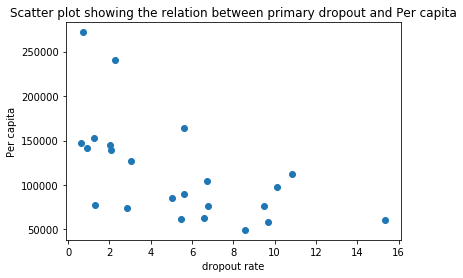

In [174]:
plt.scatter(Dropout_gsdp_df["Primary - 2014-2015.1"],Dropout_gsdp_df["Per Capita GSDP (Rs.)"])
plt.title("Scatter plot showing the relation between primary dropout and Per capita")
plt.xlabel("dropout rate")
plt.ylabel("Per capita")
plt.show()

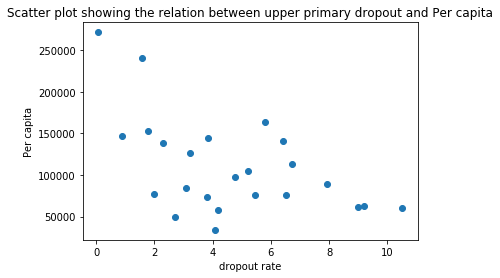

In [175]:
plt.scatter(Dropout_gsdp_df["Upper Primary - 2014-2015"],Dropout_gsdp_df["Per Capita GSDP (Rs.)"])
plt.title("Scatter plot showing the relation between upper primary dropout and Per capita")
plt.xlabel("dropout rate")
plt.ylabel("Per capita")
plt.show()

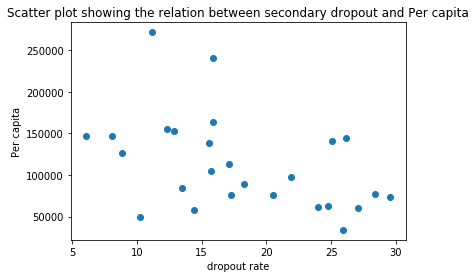

In [176]:
plt.scatter(Dropout_gsdp_df["Secondary - 2014-2015"],Dropout_gsdp_df["Per Capita GSDP (Rs.)"])
plt.title("Scatter plot showing the relation between secondary dropout and Per capita")
plt.xlabel("dropout rate")
plt.ylabel("Per capita")
plt.show()

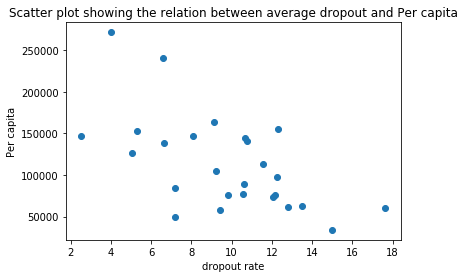

In [177]:
plt.scatter(Dropout_gsdp_df['Average drop rate'],Dropout_gsdp_df["Per Capita GSDP (Rs.)"])
plt.title("Scatter plot showing the relation between average dropout and Per capita")
plt.xlabel("dropout rate")
plt.ylabel("Per capita")
plt.show()

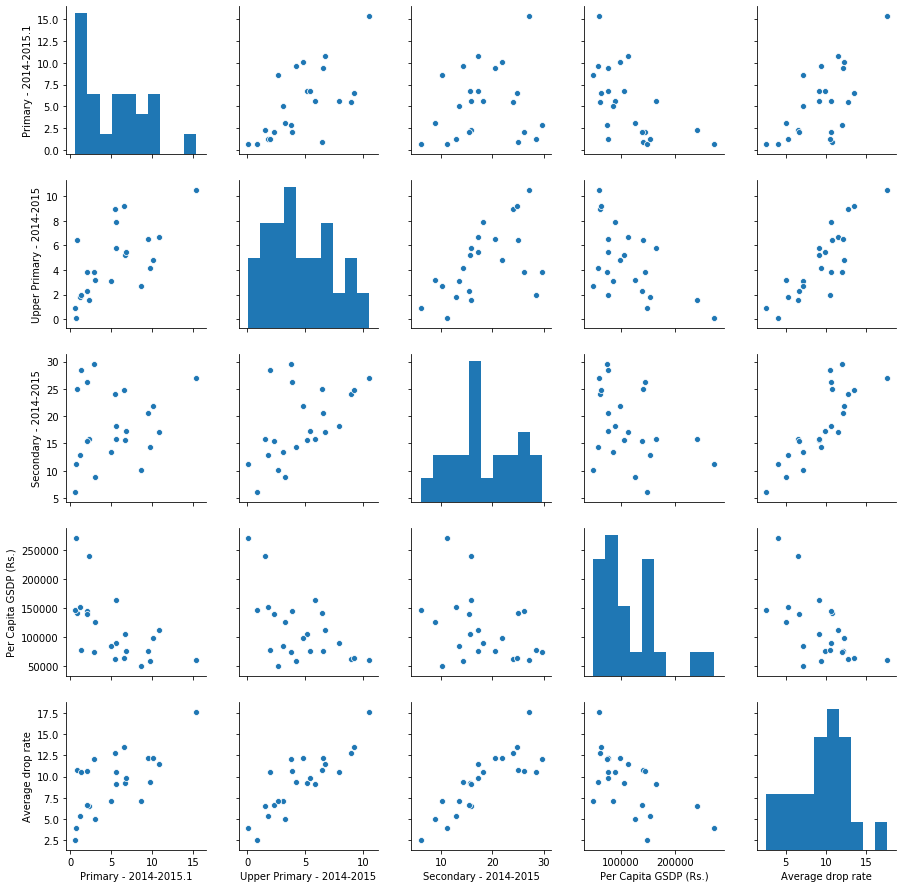

In [178]:
#removed missing values to plot pair plot
sns.pairplot(Dropout_gsdp_df.dropna())
plt.show()

In [179]:
#primary and secondary dropout rate is highly negatively correlated to Per capita 

In [180]:
#Secondary drop out rate is negatively correlated to Per Capita